In [1]:
category = 'mac_and_cheese'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from product_meta_analysis.database.database import Database
from product_meta_analysis.aggregate import reddit as r
from product_meta_analysis.analyze import basic_plots as p



### Get data

In [3]:
db = Database()
annotations = db.read(f"""
    select 
        url_id,
        annotation, 
        annotation_id
    from website_content_annotations 
    where category='{category}'
    """)
annotations = pd.DataFrame(annotations, columns=['url_id', 'annotation', 'annotation_id'])
db.close() 

annotations.head(5)

,url_id,annotation,annotation_id
0,f4c88b0bf29044fc38ba48198cd7f1efde4e4ac768c001...,cheddar,f4c88b0bf29044fc38ba48198cd7f1efde4e4ac768c001...
1,f4c88b0bf29044fc38ba48198cd7f1efde4e4ac768c001...,parmesan,f4c88b0bf29044fc38ba48198cd7f1efde4e4ac768c001...
2,427c694669ec9066babdf14186f394d0cbbe892f94f007...,sharp cheddar,427c694669ec9066babdf14186f394d0cbbe892f94f007...
3,427c694669ec9066babdf14186f394d0cbbe892f94f007...,cheddar,427c694669ec9066babdf14186f394d0cbbe892f94f007...
4,427c694669ec9066babdf14186f394d0cbbe892f94f007...,gruyere,427c694669ec9066babdf14186f394d0cbbe892f94f007...


### Summary across match terms

In [4]:
annotations['url_id'].nunique()

28

### Summary by match term

In [5]:
annotation_counts = annotations \
    .groupby('annotation') \
    .count() \
    .reset_index()
    
annotation_counts

,annotation,url_id,annotation_id
0,american,1,1
1,cheddar,27,27
2,colby,3,3
3,fontina,1,1
4,gruyere,4,4
5,jack,5,5
6,medium cheddar,1,1
7,mozzarella,2,2
8,parmesan,3,3
9,sharp cheddar,18,18


### Plots

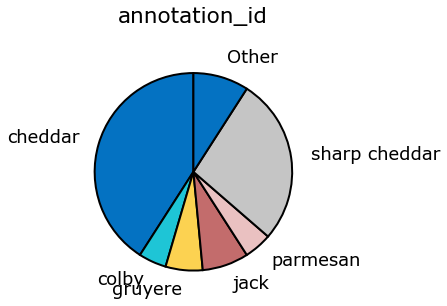

In [6]:
p.create_pie_chart(annotation_counts, column='annotation_id', name_column='annotation')

In [8]:
p.create_bar_chart(annotation_counts, column='annotation_id', name_column='annotation')

TypeError: create_bar_chart() got an unexpected keyword argument 'name_column'